 The results of the time series forecasting model using SVR with the CO2 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('../WEEK_08/data/CO2 dataset.csv')
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [6]:
df['Year'] = pd.to_datetime(df['Year'])
df = df.set_index('Year')

In [7]:
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
X_train = train_data.index.year.values.reshape(-1, 1)
y_train = train_data['CO2']
X_test = test_data.index.year.values.reshape(-1, 1)
y_test = test_data['CO2']

In [9]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [12]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 14.59
Mean Squared Error (MSE): 213.47
Root Mean Squared Error (RMSE): 14.61


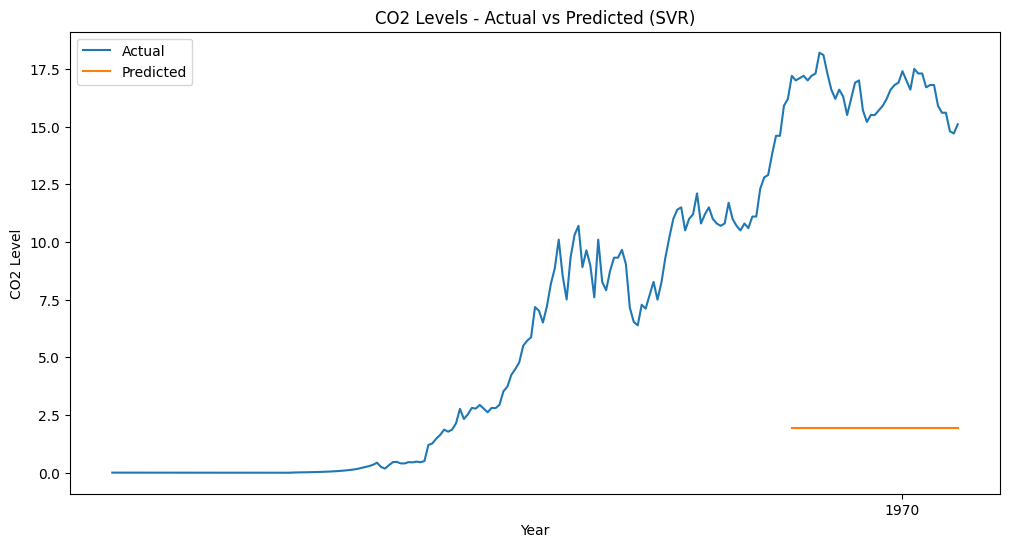

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CO2'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.title('CO2 Levels - Actual vs Predicted (SVR)')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

The SVR model leverages the relationship between the year (input feature) and the CO2 levels (output variable) observed in the training data to make predictions for the testing data. By capturing the underlying patterns in the training set, the model attempts to generalize and forecast future CO2 levels.